<img src='https://media1.giphy.com/media/rqyvY6FHORTEs/giphy.gif' width=100px>

<h1>Applied Text Mining and Sentiment Analysis with Python</h1>

Welcome! 




<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `Section 1` Dataset Overview



In this section, we are going to have a look at the dataset that we will use all along the course.

***Note***: for optimal course follow-up, you will need a Google Account with the Google Drive functionnality. If you don't have a Google Account, you can create a new one (it's totally *free*) or simply download the dataset ressource and manually upload it to the current session. 

If you prefer not to use any Google apps for this course, it's totally fine ... You can simply download this notebook together with the dataset and use them with your favourite IDE (Pycharm / Spyder / Jupyter Notebook / ...)! No constraint here 🙃

... In any case, enjoy!

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.1** Load and analyze Dataset

Very useful packages for Data Analysis.





In [1]:
import pandas as pd
import numpy as np

* Read Dataframe stored in Google Drive under `.csv` format

In [2]:
import pandas as pd

# Read the dataset from CSV file with specified delimiter
df = pd.read_csv("data/tweet_data.csv")

df


,textID,tweet_text,sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative
1,1956967696,Funeral ceremony...gloomy friday...,negative
2,1956967789,wants to hang out with friends SOON!,positive
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative
...,...,...,...
18722,1753918818,"had SUCH and AMAZING time last night, McFly we...",positive
18723,1753918881,@jasimmo Ooo showing of your French skills!! l...,positive
18724,1753918900,Succesfully following Tayla!!,positive
18725,1753919001,Happy Mothers Day All my love,positive


* Use the `sample` method to look at some random tweets present in our dataset

* Check how many tweets there are in total

In [3]:
print("Number of tweets: {}".format(len(df)))

Number of tweets: 18727


In [4]:
df.sample(20)

,textID,tweet_text,sentiment
5567,1963351671,It rains and it sucks so much because it's the...,negative
7042,1964681741,Maaaan... it is way too nice outside to be in ...,positive
14766,1752054829,Good night peeps! Give to your mom's the great...,positive
12881,1695846205,Good morning World! Happy Star Wars Day! May t...,positive
7660,1965269693,"i really really hate biology , u______________...",negative
5232,1963093175,@mtmodular Pixies - Number 13 gives me such an...,positive
5527,1963324397,Doctor then work. Hope you bitches have fun at...,positive
1477,1957702343,@breagrant Thought you was one of the best on ...,positive
7632,1965256472,@Mitchelmusso: Am sad i got no money on my pho...,negative
4563,1962616809,@lauriedriscoll did you finish twilight? i did...,positive


In [6]:
# Filter positive sentiment tweets
new_data = df[df["sentiment"] == "positive"].copy()

# Display the new DataFrame
print(new_data.head())

        textID                                         tweet_text sentiment
2   1956967789               wants to hang out with friends SOON!  positive
22  1956977084  mmm much better day... so far! it's still quit...  positive
23  1956977187  @DavidArchie &lt;3 your gonna be the first  tw...  positive
26  1956978668  @onscrn Ahh.  ... Well, I was hoping that I co...  positive
28  1956979894  Chocolate milk is so much better through a str...  positive


In [10]:
print("Number of non depress tweets: {}".format(df[df["sentiment"]=="positive"].count()[0]))

Number of non depress tweets: 9897


In [15]:
# Change positive sentiment to 0
new_data.loc[new_data["sentiment"] == "positive", "sentiment"] = 0
new_data = new_data.drop(["textID"], axis=1)
# Display the updated DataFrame
new_data.head()


,tweet_text,sentiment
2,wants to hang out with friends SOON!,0
22,mmm much better day... so far! it's still quit...,0
23,@DavidArchie &lt;3 your gonna be the first tw...,0
26,"@onscrn Ahh. ... Well, I was hoping that I co...",0
28,Chocolate milk is so much better through a str...,0


In [17]:
# Rename the columns
new_data = new_data.rename(columns={"tweet_text": "Text", "sentiment": "Sentiment"})

# Display the updated DataFrame
new_data.head()

,Text,Sentiment
2,wants to hang out with friends SOON!,0
22,mmm much better day... so far! it's still quit...,0
23,@DavidArchie &lt;3 your gonna be the first tw...,0
26,"@onscrn Ahh. ... Well, I was hoping that I co...",0
28,Chocolate milk is so much better through a str...,0


In [19]:
# Ambil 490 baris pertama dari new_data
limited_new_data = new_data.head(490).copy()

# Tampilkan DataFrame baru yang terbatas
print(limited_new_data)

                                                   Text Sentiment
2                  wants to hang out with friends SOON!         0
22    mmm much better day... so far! it's still quit...         0
23    @DavidArchie &lt;3 your gonna be the first  tw...         0
26    @onscrn Ahh.  ... Well, I was hoping that I co...         0
28    Chocolate milk is so much better through a str...         0
...                                                 ...       ...
2536  @musical_musings Good morning!  It is raining ...         0
2547  So I get up early and I feel good about the da...         0
2556  @tommcfly Will we see you guys in the Philippi...         0
2561  35mins through the 1hr 20mins Google Wave demo...         0
2579  Plane tickets to UK and everywhere in Europe a...         0

[490 rows x 2 columns]


In [20]:
len(limited_new_data)

490

In [22]:
# Save the limited_new_data DataFrame to a new CSV file
limited_new_data.to_csv("Non_Depressive_tweets.csv", index=False)

print("Positive tweets saved successfully.")

Positive tweets saved successfully.


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **1.2** Dataset Visualization

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.2.1** Matplotlib</h4>

* Import the `pyplot` module from the matplotlib package 

In [5]:
import matplotlib.pyplot as plt

* `pyplot` helps understanding and representing how tweets are distributed over the dataset

* Print the count of positive and negative tweets

In [12]:
print("Number of 1 tweets: {}".format(df[df["Sentiment"]==1].count()[0]))
print("Number of 0 tweets: {}".format(df[df["Sentiment"]==0].count()[0]))

Number of 1 tweets: 330
Number of 0 tweets: 669


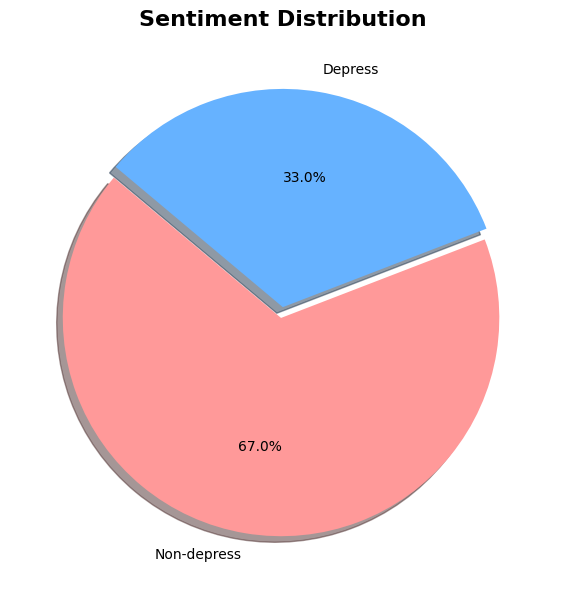

In [15]:
# Calculate sentiment counts
sentiment_count = df["Sentiment"].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size

# Define colors for the pie chart
colors = ['#FF9999', '#66B2FF']

# Create the pie chart with custom colors and explode a slice
plt.pie(sentiment_count, labels=["Non-depress", "Depress"],
        colors=colors, autopct='%1.1f%%', startangle=140,
        shadow=True, explode=(0.05, 0))

# Set the title and adjust the layout
plt.title("Sentiment Distribution", fontsize=16, fontweight="bold")
plt.tight_layout()

# Display the chart
plt.show()

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **1.2.2** Wordclouds

* The `Wordclouds` package is very useful to get a quick overview of most recurrent words in the text corpus

In [16]:
from wordcloud import WordCloud

* What are the words most often present in positive tweets?

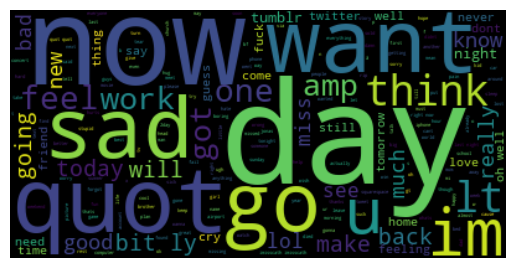

In [18]:
pos_tweets = df[df["Sentiment"] == 0]
txt = " ".join(str(tweet).lower() for tweet in pos_tweets["SentimentText"] if not pd.isnull(tweet))
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


* ... and in negative tweets?

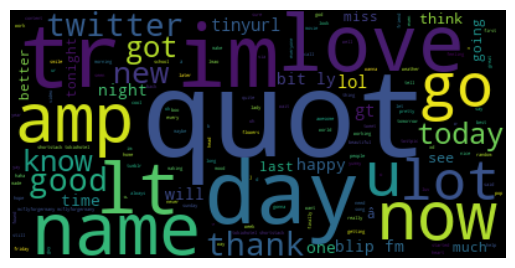

In [19]:
pos_tweets = df[df["Sentiment"] == 1]
txt = " ".join(str(tweet).lower() for tweet in pos_tweets["SentimentText"] if not pd.isnull(tweet))
wordcloud = WordCloud().generate(txt)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [726]:
print(df.columns)


Index(['text', 'label'], dtype='object')


That's it for this section! 

See you in `Section 2` where we will talk about Text Normalization and get our hands dirty with some real tweets!

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=650px>

# `SECTION 2` Text Normalization

As this section relies quite a lot on `REGEX`, you might want to have a look at the following website: https://regexr.com/

* Import `regex` package

In [727]:
import re

<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.1** Twitter features

* Example of a *random* tweet that can be found on Twitter

In [728]:
tweet = "RT @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.1** RT Tag

#### Need a hint?

* `R` : match "R" character
* `T` : match "T" character
* `\s` : match any whitespace character
* `+` : match one or more of the preceding tokens

#### Handle the RT Tag

* Replace occurences of `RT` with a default value

In [729]:
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

In [730]:
print("Processed tweet: {}".format(replace_retweet(tweet)))

Processed tweet: @AIOutsider I love this! 👍 https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.2** @User Tag

#### Need a hint?




* `\B` : match any position that is not a word boundary
* `@` : match "@" character
* `\w` : match any word character 
* `+` : match one or more of the preceding tokens

#### Handle the User Tag

* Replace `@_Someone_` with a default user tag

In [731]:
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [732]:
print("Processed tweet: {}".format(replace_user(tweet)))

Processed tweet: RT twitteruser I love this! 👍 https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.3** Emojis

* Install the `emoji` package

* Import the installed package

In [733]:
import emoji

* Replace emojis with a meaningful text

In [734]:
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [735]:
print("Processed tweet: {}".format(demojize(tweet)))

Processed tweet: RT @AIOutsider I love this! :thumbs_up: https://AIOutsider.com #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.4** URL

#### Need a hint?

* `(http|https)` : capturing group matching either http or https
* `:` : match the ":" character
* `\/` : match the "/" charachter
* `\S` : match any character that is not whitespace
* `+` : match one or more of the preceding tokens

#### Handle the URL

* Replace occurences of `http://` or `https://` with a default value

In [736]:
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

In [737]:
print("Processed tweet: {}".format(replace_url(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍  #NLP #Fun


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.1.5** Hashtags

* Replace occurences of `#_something_` with a default value

In [738]:
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

In [739]:
print("Processed tweet: {}".format(replace_hashtag(tweet)))

Processed tweet: RT @AIOutsider I love this! 👍 https://AIOutsider.com NLP Fun


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.2** Word Features

Let's now have a look at some other features that are not really Twitter-dependant

In [740]:
tweet = "LOOOOOOOOK at this ... I'd like it so much!"

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.1** Remove upper capitalization

* Lower case each letter in a specific tweet

In [741]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [742]:
print("Processed tweet: {}".format(to_lowercase(tweet)))

Processed tweet: looooooook at this ... i'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.2** Word repetition

* Replace word repetition with a single occurence ("oooooo" becomes "oo")

In [743]:
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

In [744]:
print("Processed tweet: {}".format(word_repetition(tweet)))

Processed tweet: LOOK at this .. I'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.3** Punctuation repetition

* Replace punctuation repetition with a single occurence ("!!!!!" becomes "!")

In [745]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

In [746]:
print("Processed tweet: {}".format(punct_repetition(tweet)))

Processed tweet: LOOOOOOOOK at this . I'd like it so much!


### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.2.4** Word contraction

* Install the `contractions` package

* Import the installed package

In [747]:
import contractions

* Use `contractions_dict` to list most common contractions

In [748]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions dictionnary

In [749]:
def _fix_contractions(tweet):
  for k, v in contractions.contractions_dict.items():
    tweet = tweet.replace(k, v)
  return tweet

In [750]:
print("Processed tweet: {}".format(_fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


* Create a `_fix_contractions` function used to replace contractions with their extended forms by using the contractions package

In [751]:
def fix_contractions(tweet):
  tweet = contractions.fix(tweet)
  return tweet

In [752]:
print("Processed tweet: {}".format(fix_contractions(tweet)))

Processed tweet: LOOOOOOOOK at this ... I would like it so much!


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.3** Tokenization

More information about NLTK? Head over to: https://www.nltk.org

* Install the `NLTK` package

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.1** Easy Tokenization

* Import `NLTK`
* Import the `word_tokenize` module from NLTK 
* Download the `Punkt` tokenizer model from NLTK

In [753]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

* Simple tweet to be tokenized

In [754]:
tweet = "These are 5 different words!"

* Create a `tokenize()` function that takes a tweet as input and returns a list of tokens

In [755]:
def tokenize(tweet):
  tokens = word_tokenize(tweet)
  return tokens

* Use the `tokenize()` function to print the tokenized version of a tweet

In [756]:
print(type(tokenize(tweet)))
print("Tweet tokens: {}".format(tokenize(tweet)))

<class 'list'>
Tweet tokens: ['These', 'are', '5', 'different', 'words', '!']


That's it for the easy method! You will now see there is more you can do about it.

### <img src='https://drive.google.com/uc?export=view&id=1aAdtCrMe6SORoGAGtjOVM0UIxDFH9Thq' width=50px> **2.3.2** Custom Tokenization

* Import the `string` package 

In [757]:
import string

* Retrieve english punctuation signs by using the `string` package

In [758]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


* Import the `stopwords` module from NLTK
* Download `stopwords` data from NLTK

In [759]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

* Create a set of english stopwords

In [760]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'between', 'some', 'he', 're', 'been', 'should', "isn't", 'mightn', 'weren', 'himself', 'be', "hadn't", "don't", 'haven', 'before', 'than', "you'd", 'isn', 'once', 'does', 'its', 'themselves', 'is', "needn't", "it's", 'no', 'having', 'from', 'then', 'needn', 'when', 'herself', 'by', 'will', 'can', 'too', 'over', 'into', 'above', 'mustn', 'down', 'nor', 'do', 'very', 've', "shouldn't", 't', 'll', 'and', 'an', 'ourselves', 'yours', 'him', 'under', 'during', 'up', 'there', "wasn't", 'those', 'y', 'more', 'all', 'don', 'they', 'won', "she's", 'have', 'hasn', "didn't", "couldn't", 'a', 'didn', 'was', 'she', 'here', 'are', 'who', 'not', 'were', 'only', 'at', 'after', 'theirs', 'which', 'or', 'off', 'in', 'wouldn', 'our', 'about', 'what', 'aren', 'these', 'i', "you'll", 'your', 'own', 'shan', 'wasn', 'ma', "shan't", 'below', 'o', 'as', 'such', 'doesn', 'did', 'has', 'until', "aren't", 'because', 'we', 'for', 'doing', "that'll", 'myself', 'her', 'this', 'yourself', 'the', 'through', "weren't"

* Remove some stopwords from the set

In [761]:
stop_words.discard('not')
print(stop_words)

{'between', 'some', 'he', 're', 'been', 'should', "isn't", 'mightn', 'weren', 'himself', 'be', "hadn't", "don't", 'haven', 'before', 'than', "you'd", 'isn', 'once', 'does', 'its', 'themselves', 'is', "needn't", "it's", 'no', 'having', 'from', 'then', 'needn', 'when', 'herself', 'by', 'will', 'can', 'too', 'over', 'into', 'above', 'mustn', 'down', 'nor', 'do', 'very', 've', "shouldn't", 't', 'll', 'and', 'an', 'ourselves', 'yours', 'him', 'under', 'during', 'up', 'there', "wasn't", 'those', 'y', 'more', 'all', 'don', 'they', 'won', "she's", 'have', 'hasn', "didn't", "couldn't", 'a', 'didn', 'was', 'she', 'here', 'are', 'who', 'were', 'only', 'at', 'after', 'theirs', 'which', 'or', 'off', 'in', 'wouldn', 'our', 'about', 'what', 'aren', 'these', 'i', "you'll", 'your', 'own', 'shan', 'wasn', 'ma', "shan't", 'below', 'o', 'as', 'such', 'doesn', 'did', 'has', 'until', "aren't", 'because', 'we', 'for', 'doing', "that'll", 'myself', 'her', 'this', 'yourself', 'the', 'through', "weren't", "you'

* Create a `custom_tokenize` function

In [762]:
def custom_tokenize(tweet,
                    keep_punct = False,
                    keep_alnum = False,
                    keep_stop = False):
  
  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]

  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]
  
  if not keep_stop:
    stop_words = set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

  return token_list

* Test the function with a particular tweet

In [763]:
tweet = "these are not 5 different words!"

In [764]:
print("Tweet tokens: {}".format(custom_tokenize(tweet, 
                                                keep_punct=True, 
                                                keep_alnum=True, 
                                                keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_stop=True)))
print("Tweet tokens: {}".format(custom_tokenize(tweet, keep_alnum=True)))

Tweet tokens: ['these', 'are', 'not', '5', 'different', 'words', '!']
Tweet tokens: ['these', 'are', 'not', 'different', 'words']
Tweet tokens: ['not', '5', 'different', 'words']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.4** Stemming

More information about `NLTK.stem`? Head over to: https://www.nltk.org/api/nltk.stem.html

* Import different libraries and modules used for stemming

In [765]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

* List of tokens to stem (remember that we stem tokens and not entire sentences)

In [766]:
tokens = ["manager", "management", "managing"]

* Stemmers can be defined by directly using NLTK

In [767]:
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()
snoball_stemmer = SnowballStemmer('english')

* Create a `stem_tokens` function that takes the list of tokens as input and returns a list of stemmed tokens

In [768]:
def stem_tokens(tokens, stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

* Print the different results and compare the stemmed tokens

In [769]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['manag', 'manag', 'manag']
Lancaster stems: ['man', 'man', 'man']
Snowball stems: ['manag', 'manag', 'manag']


* Check over-stemming and under-stemming

In [770]:
tokens = ["international", "companies", "had", "interns"]

In [771]:
print("Porter stems: {}".format(stem_tokens(tokens, porter_stemmer)))
print("Lancaster stems: {}".format(stem_tokens(tokens, lancaster_stemmer)))
print("Snowball stems: {}".format(stem_tokens(tokens, snoball_stemmer)))

Porter stems: ['intern', 'compani', 'had', 'intern']
Lancaster stems: ['intern', 'company', 'had', 'intern']
Snowball stems: ['intern', 'compani', 'had', 'intern']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.5** Lemmatization

More information about WordNet? Head over to https://wordnet.princeton.edu/

* Import different libraries and modules used for lemmatization

In [772]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* List of tokens to lemmatize (remember that we lemmatize tokens and not entire sentences)

In [773]:
tokens = ["international", "companies", "had", "interns"]

* Part of Speech (POS) tagging

In [774]:
word_type = {"international": wordnet.ADJ, 
             "companies": wordnet.NOUN, 
             "had": wordnet.VERB, 
             "interns": wordnet.NOUN
             }

* Create the lemmatizer by using the `WordNet` module

In [775]:
lemmatizer = WordNetLemmatizer()

* Create a `lemmatize_tokens` function that takes the list of tokens as input and returns a list of lemmatized tokens

In [776]:
def lemmatize_tokens(tokens, word_type, lemmatizer):
  token_list = []
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token, word_type[token]))
  return token_list

In [777]:
print("Tweet lemma: {}".format(
    lemmatize_tokens(tokens, word_type, lemmatizer)))

Tweet lemma: ['international', 'company', 'have', 'intern']


<img src='https://drive.google.com/uc?export=view&id=1GYj-wj-so8jQ9-VDz1ayehgVh39Jmd4H' width=250px>

## **2.6** Putting it all together

* Long and complex tweet to be processed

In [778]:
complex_tweet = r"""RT @AIOutsider : he looooook, 
THis is a big and complex TWeet!!! 👍 ... 
We'd be glad if you couldn't normalize it! 
Check https://t.co/7777 and LET ME KNOW!!! #NLP #Fun"""

* Create a custom `process_tweet` function that can be used to process tweets end-to-end
* **Note**: this function will be used as a base for the following sections, so be careful!

In [779]:
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # lower case
  tweet = fix_contractions(tweet) # replace contractions
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition
  tweet = demojize(tweet) # replace emojis
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  ## Tokenization & Stemming
  tokens = custom_tokenize(tweet, keep_alnum=False, keep_stop=False) # tokenize
  stemmer = SnowballStemmer("english") # define stemmer
  stem = stem_tokens(tokens, stemmer) # stem tokens

  return stem

* Test your `process_tweet` function!

In [780]:
print(process_tweet(complex_tweet, verbose=False))

['look', 'big', 'complex', 'tweet', 'would', 'glad', 'could', 'not', 'normal', 'check', 'let', 'know', 'nlp', 'fun']


* Look at some more examples! 
* **Note:** it's totally possible you encounter some strange tweet processing (happens if the original tweet is initially strangely written) 

In [781]:
import random

In [782]:
for i in range(5):
  tweet_id = random.randint(0,len(df))
  tweet = df.iloc[tweet_id]["text"]
  print(process_tweet(tweet, verbose=True))
  print("\n")

Initial tweet: want to sleep restless, wake up restless. what do you want to die for?
Post Twitter processing tweet: want to sleep restless, wake up restless. what do you want to die for?
Post Word processing tweet: want to sleep restless, wake up restless. what do you want to die for?
['want', 'sleep', 'restless', 'wake', 'restless', 'want', 'die']


Initial tweet: yuhsww
Post Twitter processing tweet: yuhsww
Post Word processing tweet: yuhsww
['yuhsww']


Initial tweet: been the most anxious person, before becoming the most sincere person
Post Twitter processing tweet: been the most anxious person, before becoming the most sincere person
Post Word processing tweet: been the most anxious person, before becoming the most sincere person
['anxious', 'person', 'becom', 'sincer', 'person']


Initial tweet: Moots, anyone joined go aespa?
Post Twitter processing tweet: Moots, anyone joined go aespa?
Post Word processing tweet: moots, anyone joined go aespa?
['moot', 'anyon', 'join', 'go', 'a

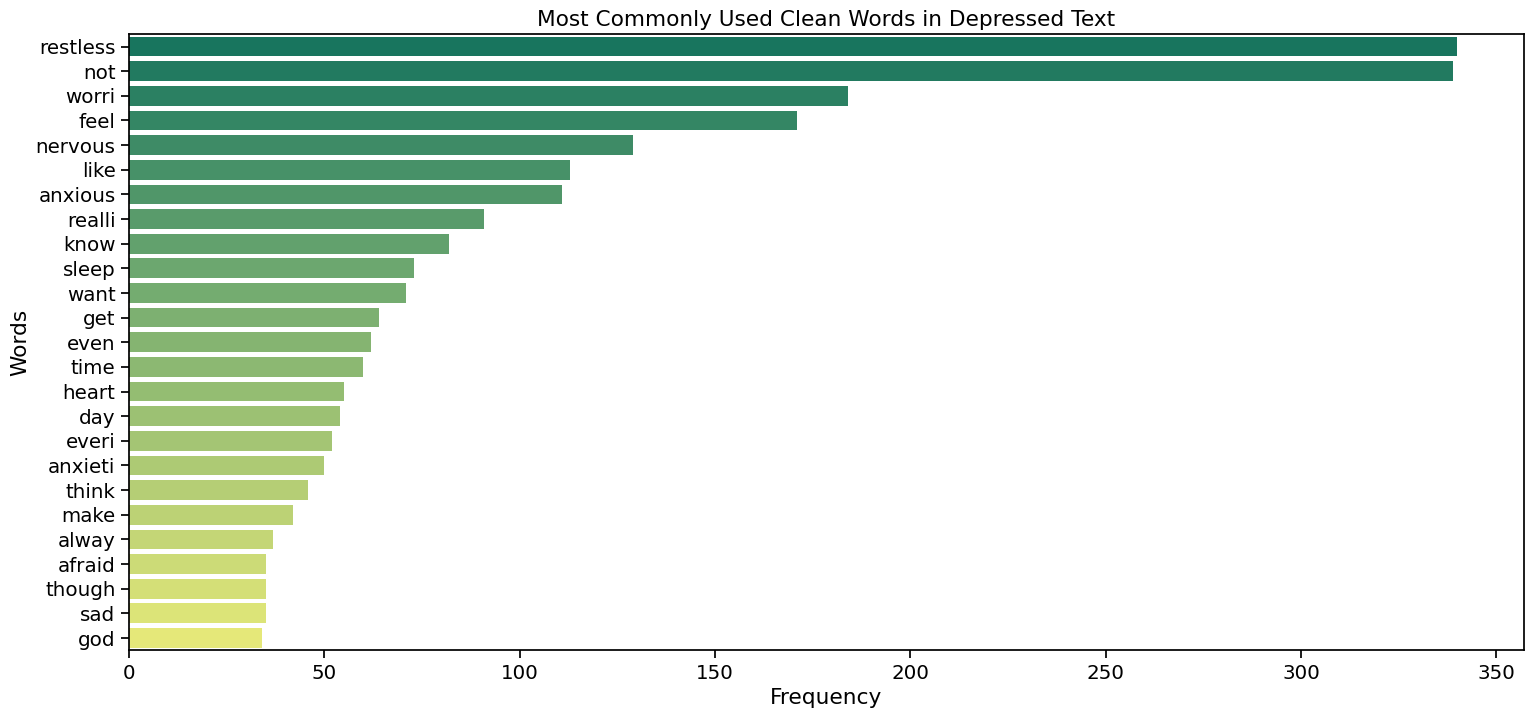

In [783]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

all_depressed_words = []
for sentence in df[df['label'] == 1.0]['text'].astype(str).tolist():
    processed_sentence = process_tweet(sentence)
    all_depressed_words.extend(processed_sentence)

data = pd.DataFrame(Counter(all_depressed_words).most_common(25), columns=['Word', 'Frequency'])

sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(18, 8))
sns.barplot(y=data['Word'], x=data['Frequency'], palette='summer')
plt.title("Most Commonly Used Clean Words in Depressed Text")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

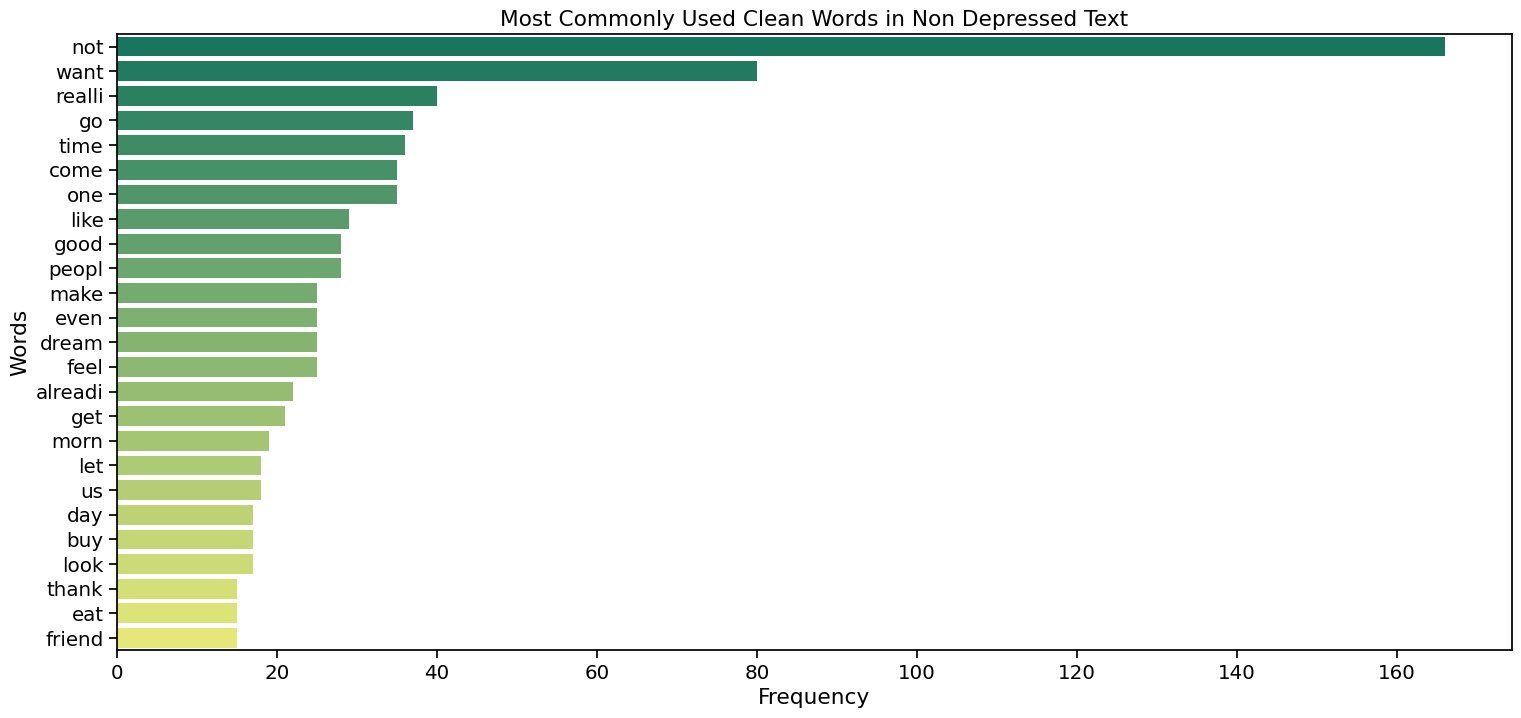

In [784]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

all_non_depressed_words = []
for sentence in df[df['label'] == 0.0]['text'].astype(str).tolist():
    processed_sentence = process_tweet(sentence)
    all_non_depressed_words.extend(processed_sentence)

data2 = pd.DataFrame(Counter(all_non_depressed_words).most_common(25), columns=['Word', 'Frequency'])

sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(18, 8))
sns.barplot(y=data2['Word'], x=data2['Frequency'], palette='summer')
plt.title("Most Commonly Used Clean Words in Non Depressed Text")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()